In [82]:
import gensim

In [83]:
!pip install wordcloud 

In [84]:
from wordcloud import WordCloud

In [131]:
import nltk
nltk.download('punkt')
import stop_words
import pandas as pd 
import numpy as np

[nltk_data] Downloading package punkt to /Users/shreya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [239]:
from gensim import corpora, models, similarities
from stop_words import get_stop_words
en_stop = get_stop_words('en')

In [240]:
type(en_stop)

list

In [241]:
my_stop_words=['also','per','cent','january','february','october','mpc','march','april','may','june','july','august','september','november','december']
en_stop=en_stop+my_stop_words

In [242]:
en_stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

In [87]:
!pip install lda
import lda

In [88]:
import matplotlib.pyplot as plt 

In [89]:
from gensim.corpora.dictionary import Dictionary
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
tokenizer = RegexpTokenizer(r'\w+')
stemmer=  SnowballStemmer("english")
lemmatizer=WordNetLemmatizer()

In [90]:
from gensim import corpora, models

In [91]:
!pip install PyPDF2

In [92]:
#importing the report  
import PyPDF2 
pdfFileObj = open('MPC_first.pdf', 'rb') 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj)   
# printing number of pages in pdf file 
num = (pdfReader.numPages) 
  
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')

In [93]:
# splitting the report into pages 
doc_set= [pdfReader.getPage(k).extractText() for k in range(num) ]
for k in range(num):
    doc_set[k]=doc_set[k].replace('\n',"")
    doc_set[k]=sent_detector.tokenize(doc_set[k].strip())

In [94]:
# splitting the document into sentences 
doc_set=[item for k in range(num) for item in doc_set[k]]
# doc_set now contains each sentence of a report as a document 

In [95]:
len(doc_set)

378

In [265]:
nltk.download('wordnet')
#using the tokenizer and stemmer and stopped tokens 
texts=[]
for i in doc_set:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    

    # remove stop words from tokens
    stopped_tokens = [i for i in tokens if not i in en_stop]
    
    #lemmatize tokens
    lemmatized_tokens = [lemmatizer.lemmatize(i) for i in stopped_tokens]
    
    # Remove numbers, but not words that contain numbers 
    final_tokens=[token for token in lemmatized_tokens if not token.isnumeric()]
    
    # add tokens to list
    texts.append(final_tokens)


[nltk_data] Downloading package wordnet to /Users/shreya/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [103]:
from gensim.models import Phrases 

In [266]:
bigram = Phrases(texts, min_count=20)
for idx in range(len(texts)):
    for token in bigram[texts[idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            texts[idx].append(token)

In [200]:
texts

[['press',
  'release',
  '400001',
  '_____________________________________________________________________________________________________________________',
  'department',
  'communication',
  'central',
  'office',
  's',
  'b',
  's',
  'marg',
  'mumbai',
  '400001',
  'phone',
  '022',
  '22610835',
  'fax',
  '91',
  '22',
  '22660358',
  'reserve',
  'bank',
  'india',
  '0',
  'www',
  'rbi',
  'org',
  'hindi',
  'website',
  'www',
  'rbi',
  'org',
  'email',
  'helpdoc',
  'rbi',
  'org',
  'december',
  '19',
  '2018',
  'minute',
  'monetary',
  'policy',
  'committee',
  'meeting',
  'december',
  '3',
  '5',
  '2018',
  'section',
  '45zl',
  'reserve',
  'bank',
  'india',
  'act',
  '1934',
  'fourteenth',
  'meeting',
  'monetary',
  'policy',
  'committee',
  'constituted',
  'section',
  '45zb',
  'reserve',
  'bank',
  'india',
  'act',
  '1934',
  'held',
  'december',
  '3',
  '5',
  '2018',
  'reserve',
  'bank',
  'india',
  'mumbai'],
 ['2'],
 ['meeting',
 

In [203]:
len(texts)

378

In [271]:


dictionary = corpora.Dictionary(texts)
dictionary.filter_extremes(no_below=7,no_above=0.5)

In [272]:
len(dictionary)

148

In [273]:
corpus = [dictionary.doc2bow(text) for text in texts]


In [274]:
type(corpus)

list

In [275]:
len(corpus)

378

In [276]:
# training the model 
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=15, id2word = dictionary, passes=200)

In [277]:
f=open('topics.txt',"w")
for k in range(15):
    print(ldamodel.print_topics()[k][1])
    print('/n')
    f.write(ldamodel.print_topics()[k][1] )
    f.write('/n')
    

0.203*"inflation" + 0.065*"impact" + 0.048*"hra" + 0.047*"food" + 0.042*"fuel" + 0.038*"headline" + 0.034*"price" + 0.032*"month" + 0.029*"excluding" + 0.029*"cpi"
/n
0.115*"oil" + 0.108*"price" + 0.102*"oil_price" + 0.069*"crude" + 0.059*"sector" + 0.054*"u" + 0.045*"manufacturing" + 0.039*"quarter" + 0.027*"decline" + 0.026*"consumption"
/n
0.121*"high" + 0.086*"basis" + 0.077*"activity" + 0.077*"point" + 0.063*"investment" + 0.049*"fiscal" + 0.045*"domestic" + 0.045*"rate" + 0.045*"output" + 0.044*"indicator"
/n
0.136*"expectation" + 0.087*"month" + 0.079*"ahead" + 0.068*"unchanged" + 0.057*"inflation" + 0.053*"inflationary" + 0.052*"household" + 0.047*"one" + 0.044*"basis" + 0.042*"year"
/n
0.173*"inflation" + 0.146*"food" + 0.081*"outlook" + 0.070*"price" + 0.059*"oil" + 0.049*"deflation" + 0.049*"group" + 0.045*"oil_price" + 0.037*"crude" + 0.036*"projection"
/n
0.161*"risk" + 0.079*"forward" + 0.071*"resolution" + 0.069*"based" + 0.066*"inflation" + 0.062*"going" + 0.053*"upside

In [278]:
dict(ldamodel.show_topic(1))

{'oil': 0.1153718,
 'price': 0.10776003,
 'oil_price': 0.101602,
 'crude': 0.06912776,
 'sector': 0.059299145,
 'u': 0.054160997,
 'manufacturing': 0.04545904,
 'quarter': 0.039332513,
 'decline': 0.026579564,
 'consumption': 0.026102694}

In [303]:
from matplotlib.backends.backend_pdf import PdfPages
pp = PdfPages('multipage.pdf')

ValueError: Format '.pdf' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff)

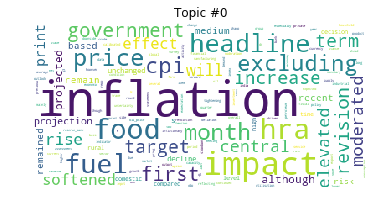

In [307]:

for t in range(ldamodel.num_topics):
    plt.figure()
    plt.imshow(WordCloud(background_color='white').fit_words(dict(ldamodel.show_topic(t, 200))))
    plt.axis("off")
    plt.title("Topic #" + str(t))
    plt.savefig(pp,format='pdf')

In [295]:
pp.close()

In [280]:
# creating a document to get the document- topic distribution 
my_doc=pdfReader.getPage(2).extractText()
my_doc=dictionary.doc2bow(tokenizer.tokenize(my_doc))

In [281]:
en_stop

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 "can't",
 'cannot',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 "let's",
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ought',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'same',
 "shan't",
 'she',
 "she'd",
 "she'll",
 "she's",
 'should',
 "s

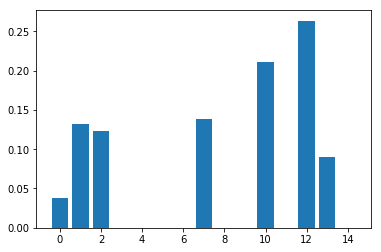

In [282]:
# checking what is the topic distribution for our document 
data=ldamodel.get_document_topics(my_doc)
x=range(15)
y_val=np.zeros(15)
for item in data:
    y_val[item[0]]=item[1]

plt.bar(x,y_val)
plt.show()